In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "6"
os.environ["CUDA_DEVICE_ORDEER"] = "PCI_BUS_ID"

In [93]:
import pickle

import pandas as pd

mentions = pickle.load(open("../data/sentiment_dataset/mentions texts.pickle", "rb"))
mentions.drop(columns=["messageid"], inplace=True)
sentiment = pickle.load(open("../data/sentiment_dataset/sentiment_texts.pickle", "rb"))
len(mentions), len(sentiment)

(19355, 9289)

In [94]:
issuers = pd.read_excel("../data/sentiment_dataset/names and synonyms.xlsx")
issuers.drop(columns=["VeryOddCompany"], inplace=True)

In [95]:
issuers["ticker"] = issuers["BGTicker"].copy()
issuers["ticker"].fillna(issuers["BGTicker.1"], inplace=True)
issuers["HumanName"] = issuers["Unnamed: 5"].copy()
issuers["HumanName"].fillna(issuers["Unnamed: 6"], inplace=True)
issuers["HumanName"].fillna(issuers["Unnamed: 7"], inplace=True)
issuers["HumanName"].fillna(issuers["Unnamed: 8"], inplace=True)
issuers["HumanName"].fillna(issuers["Unnamed: 9"], inplace=True)
issuers["HumanName"].fillna(issuers["Unnamed: 10"], inplace=True)
issuers["HumanName"].fillna(issuers["Unnamed: 11"], inplace=True)
issuers["HumanName"].fillna(issuers["Unnamed: 12"], inplace=True)
issuers["HumanName"].fillna(issuers["ticker"], inplace=True)

In [96]:
merged = pd.merge(
    mentions,
    sentiment,
    left_on=mentions.columns.tolist(),
    right_on=mentions.columns.tolist(),
    how="outer",
)
merged = pd.merge(
    merged,
    issuers[["issuerid", "HumanName", "ticker", "EMITENT_FULL_NAME"]],
    on="issuerid",
)

In [97]:
merged

,ChannelID,issuerid,MessageID,DateAdded,DatePosted,MessageText,IsForward,SentimentScore,HumanName,ticker,EMITENT_FULL_NAME
0,1197210433,90,5408,2021-02-06 01:42:42,2020-04-29 07:29:01,?? Фокус недели #ФН Сегодня ????? ММК опублик...,False,NaN,ММК,MAGN RX,"Публичное акционерное общество ""Магнитогорский..."
1,1155666448,90,659,2024-02-01 13:26:14,2024-02-01 12:25:59,"""Погрузка черных металлов на сети ОАО """"РЖД"""" ...",False,2.0,ММК,MAGN RX,"Публичное акционерное общество ""Магнитогорский..."
2,1075101206,90,3507,2021-02-06 01:02:00,2019-12-13 20:03:31,РТС — долларовый индекс стоимости российских а...,False,NaN,ММК,MAGN RX,"Публичное акционерное общество ""Магнитогорский..."
3,1215658351,90,7511,2023-06-16 13:05:52,2023-06-16 11:03:38,Вчера индекс МосБиржи поднялся к отметке 2800 ...,False,3.0,ММК,MAGN RX,"Публичное акционерное общество ""Магнитогорский..."
4,1373518643,90,9191,2023-06-19 13:09:10,2023-06-19 12:29:56,"""#металлургия Коллеги сообщают: 1) НМЛК потихо...",False,4.0,ММК,MAGN RX,"Публичное акционерное общество ""Магнитогорский..."
...,...,...,...,...,...,...,...,...,...,...,...
19400,1203560567,137,235323,2023-03-29 20:49:59,2023-03-29 17:50:40,💥🇷🇺#MSRS = макс за 7 мес,False,3.0,Россети Московский регион,MSRS,"Публичное акционерное общество ""Россети Москов..."
19401,1203560567,144,235711,2023-03-31 20:50:52,2023-03-31 19:02:18,🇷🇺#ROLO #отчетность Русолово - РСБУ 2022г,False,3.0,ROLO,ROLO,"Публичное акционерное общество ""Русолово"""
19402,1203560567,23,42607,2021-02-06 01:47:00,2019-06-13 08:46:19,??#UTAR Кредиторы предлагают Utair подумать о...,False,NaN,UTAR,UTAR,"Публичное акционерное общество ""Авиакомпания ""..."
19403,1203560567,35,235267,2023-03-29 14:49:57,2023-03-29 13:23:20,🇷🇺#BISV #отчетность Башинформсвязь - РСБУ 2022г,False,3.0,BISV,BISV,"Публичное акционерное общество ""Башинформсвязь"""


In [66]:
merged["mcid"] = merged["MessageID"].astype(str) + "_" + merged["ChannelID"].astype(str)
merged.iloc[merged["mcid"].drop_duplicates().index]["MessageText"].value_counts()

MessageText
🔥🔥🔥⚡️⚡️⚡️ Лукойл (LKOH) может заплатить 500 рублей дивидендов за 2 полугодие 2022 года, сообщает источник РДВ. #слухи  Дивидендная доходность акций Лукойла за следующие 12 месяцев может составить 20% к текущей цене.  @AK47pfl                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [67]:
print(
    f"Число строк в таблице sentiment: {sentiment.shape[0]}\nЧисло уникальных строк в таблице sentiment: {sentiment['MessageText'].unique().shape[0]}"
)

Число строк в таблице sentiment: 9289
Число уникальных строк в таблице sentiment: 7188


In [68]:
unique_sent = sentiment.MessageID.unique()
unique_ment = mentions.MessageID.unique()
print(unique_sent.shape, unique_ment.shape)

(6889,) (14263,)


In [99]:
vc = merged.MessageText.value_counts()
vc.min(), vc.median(), vc.mean(), vc.max()

(1, 1.0, 1.1683424649286531, 77)

<Axes: >

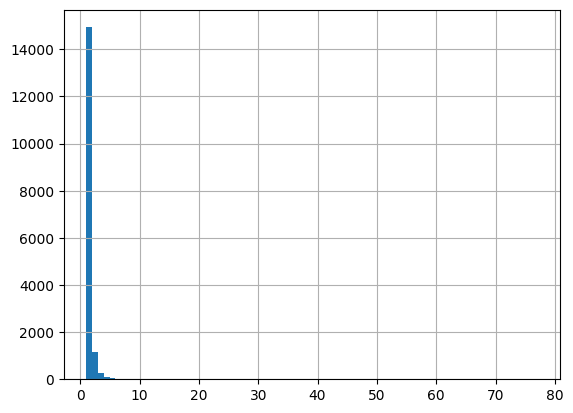

In [70]:
vc.hist(bins=max(vc))

In [71]:
vc[vc == 1].shape[0] / vc.shape[0]

0.8990908543560721

In [86]:
vc.index[1]

'Топ-30 российских компаний по капитализации. По состоянию на 4 августа 2023, в трлн руб. #цифры  1. Сбер (SBER, SBERP) 6.04 2. Роснефть (ROSN) 5.58 3. Новатэк (NVTK) 4.84 4. Лукойл (LKOH) 4.27 5. Газпром (GAZP) 4.13 6. Газпромнефть (SIBN) 2.77 7. Норникель (GMKN) 2.62 8. Полюс (PLZL) 1.58 9. Сургутнефтегаз (SNGS, SNGSP) 1.51 10. Татнефть (TATN, TATNP) 1.29 11. НЛМК (NLMK) 1.26 12. ВТБ (VTBR) 1.24 13. Северсталь (CHMF) 1.15 14. Яндекс (YNDX) 0.985 15. Фосагро (PHOR) 0.975 16. Транснефть (TRNFP) 0.888 17. Акрон (AKRN) 0.781 18. Тинькофф (TCSG) 0.715 19. Русал (RUAL) 0.667 20. Алроса (ALRS) 0.641 21. ММК (MAGN) 0.608 22. Ozon (OZON) 0.588 23. Х5 Group (FIVE) 0.587 24. ВСМПО-АВИСМА (VSMO) 0.586 25. Магнит (MGNT) 0.585 26. МТС (MTSS) 0.577 27. ПИК (PIKK) 0.559 28. ИнтерРАО (IRAO) 0.440 29. Русгидро (HYDR) 0.395 30. Fix Price (FIXP) 0.357  @AK47pfl'

In [85]:
vc.values

array([77, 17, 16, ...,  1,  1,  1])

In [146]:
merged.groupby("ChannelID").SentimentScore.mean()

ChannelID
1001029560    3.366730
1041482399    2.939394
1063908560    3.344186
1066174394    3.029412
1075101206    3.363208
1103926103         NaN
1117611294         NaN
1125172232    3.080000
1131467589    3.000000
1131897537    3.400000
1136626166    3.111111
1138179385    3.400000
1145896067    3.000000
1152653774         NaN
1155666448    3.523810
1160971567    3.286344
1168461049    3.076923
1172556372    3.369565
1172929577    3.571429
1179191696         NaN
1188379274         NaN
1197210433    3.474462
1197296889    3.366310
1199979298    3.306452
1203560567    3.319552
1215658351    3.306306
1219484576    3.336364
1221575601    3.387097
1228933667    3.291667
1229197937         NaN
1239071502         NaN
1239405989    3.393567
1265642153    3.400000
1296370416         NaN
1300011741    4.138235
1320489152    3.840000
1326656811         NaN
1351339368    3.716184
1370203419    2.384615
1370807683         NaN
1373518643    3.259259
1404564946         NaN
1411960688    3.266667
1

In [173]:
pd.set_option("display.max_columns", 500)
sentiment.groupby("issuerid")["SentimentScore"].value_counts().unstack(fill_value=0).T

issuerid,4,7,11,12,17,22,24,25,26,32,33,35,36,42,44,47,48,52,53,56,57,58,61,65,67,71,72,74,79,88,89,90,99,100,103,108,109,111,112,115,116,118,126,127,128,129,136,137,138,141,142,143,144,149,150,152,153,157,158,160,163,164,165,166,175,177,184,185,186,187,197,199,204,209,215,218,219,220,221,223,224,225,226,227,228,229,230,231,235,236,237,240,241,251,253,254,255,257,258,261,265,266,267,269,270,271,273,274
SentimentScore,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,5,0,0,0,0,2,0,119,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0
1,8,0,1,0,0,0,1,3,0,2,0,0,0,0,0,1,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,1,5,0,0,0,0,4,0,2,0,0,0,0,1,0,0,0,2,3,0,0,0,10,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,59,46,39,3,0,2,6,3,4,16,9,0,9,4,2,5,18,2,37,11,4,3,7,0,0,0,9,0,0,2,11,35,35,12,9,0,0,27,24,33,28,4,3,34,1,20,0,0,0,1,3,0,0,0,7,23,4,5,0,13,10,0,0,1,25,5,0,13,15,12,6,1,10,9,3,4,7,7,0,13,7,17,0,8,11,4,15,18,37,19,3,2,10,4,0,2,7,1,0,0,3,1,1,0,0,0,1,0
3,55,93,54,9,3,13,2,31,27,34,46,1,70,1,9,37,69,4,99,49,15,11,16,2,2,2,23,11,4,8,47,59,80,51,97,1,2,129,98,57,73,10,11,98,2,28,15,1,1,1,31,1,1,8,164,56,24,44,0,85,80,2,8,5,45,12,3,50,22,50,4,13,58,10,4,31,19,43,24,63,10,82,6,63,40,9,123,59,101,118,23,5,78,30,1,37,22,3,11,3,13,10,3,1,6,13,17,3
4,55,86,30,4,0,18,8,42,72,47,40,0,85,6,4,68,32,2,46,102,10,24,52,0,0,7,30,18,2,7,58,91,48,82,91,0,2,147,133,89,40,12,6,68,2,18,1,1,0,2,69,0,0,4,161,83,24,52,3,97,117,0,4,2,106,2,4,44,21,41,0,4,31,1,15,25,30,43,47,114,10,67,2,63,33,2,101,67,58,187,21,2,80,28,2,67,42,2,9,5,25,16,5,4,9,7,6,2
5,21,9,9,0,0,0,0,18,6,1,0,0,12,1,1,13,5,2,9,29,2,1,3,0,0,0,8,2,0,0,15,23,18,13,11,0,0,41,20,8,7,2,2,31,0,3,0,0,0,0,9,0,0,0,35,21,2,13,0,38,41,0,0,0,20,0,0,0,4,4,0,3,4,0,1,5,3,12,9,6,2,23,0,17,2,0,7,13,8,45,1,0,16,13,0,15,1,0,0,1,7,1,2,0,0,3,0,0


<Axes: xlabel='SentimentScore'>

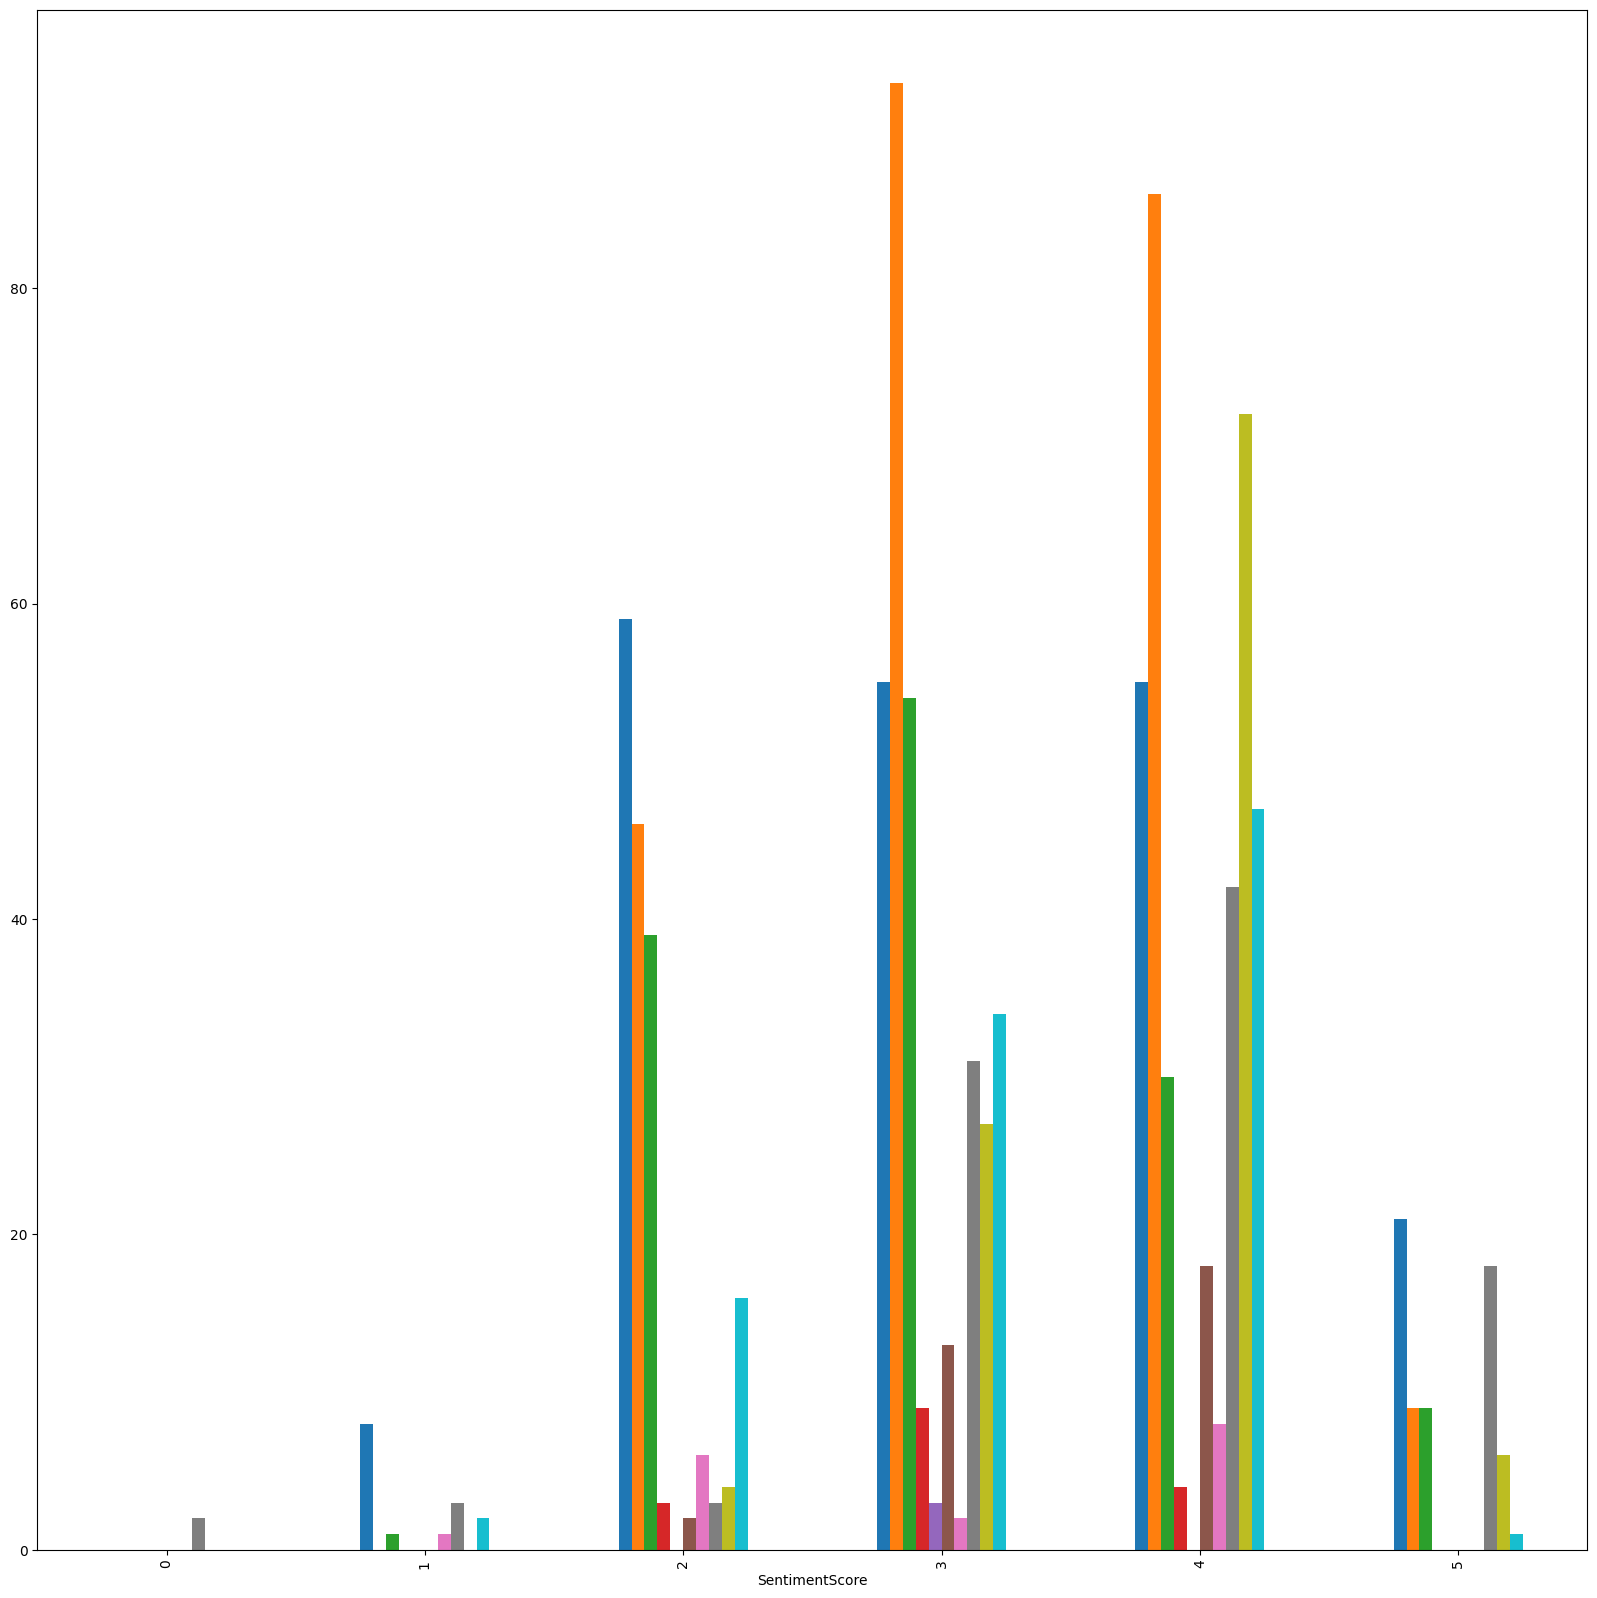

In [168]:
# import matplotlib.pylab as plt
# plt.figure(figsize=(20,20))
pd.set_option("display.max_rows", 500)
sentiment.groupby("issuerid")["SentimentScore"].value_counts().unstack(fill_value=0)[
    :10
].T.plot(kind="bar", legend=False, figsize=(20, 20))

In [152]:
s = merged[merged.MessageText == vc.index[7]]
# s.SentimentScore.value_counts()
s

,ChannelID,issuerid,MessageID,DateAdded,DatePosted,MessageText,IsForward,SentimentScore,HumanName,ticker,EMITENT_FULL_NAME,found_ticker
2276,1351339368,236,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,5.0,Яндекс,YNDX RX,Публичная Компания с ограниченной ответственно...,[]
3529,1351339368,26,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,3.0,АФК Система,AFKS RX,"Публичное акционерное общество ""Акционерная фи...",[]
3909,1351339368,221,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,5.0,Headhunter,HHRU RX,HeadHunter Group PLC (ХэдХантер Групп ПИЭЛСИ) ...,[]
4248,1351339368,223,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,3.0,Вконтакте,MAIL LI,Mail.ru Group Limited (Мэйл.ру Груп Лимитед) (...,[]
8521,1351339368,100,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,4.0,MTC,MTSS RX,"Публичное акционерное общество ""Мобильные Теле...",[]
9528,1351339368,254,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,5.0,Whoosh,WUSH,"Публичное акционерное общество ""ВУШ Холдинг""",[]
14409,1351339368,251,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,3.0,cian,CIAN,Cian PLC (эмитент депозитарных расписок - The ...,[]
14496,1351339368,142,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,4.0,ростелеком,RTKM RX,"Публичное акционерное общество ""Ростелеком""",[]
17723,1351339368,241,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,4.0,Positive tech,POSI,"Публичное акционерное общество ""Группа Позитив""",[]
18839,1351339368,237,7108,2024-02-01 13:27:13,2024-02-01 13:22:37,"🔎 Взгляд на сектор: Технологии, Медиа, Телеком...",False,2.0,softline,SFTL,Softline Holding Limited (эмитент депозитарных...,[]


In [113]:
merged.MessageText

0        ?? Фокус недели #ФН  Сегодня ????? ММК опублик...
1        "Погрузка черных металлов на сети ОАО ""РЖД"" ...
2        РТС — долларовый индекс стоимости российских а...
3        Вчера индекс МосБиржи поднялся к отметке 2800 ...
4        "#металлургия Коллеги сообщают: 1) НМЛК потихо...
                               ...                        
19400                             💥🇷🇺#MSRS = макс за 7 мес
19401           🇷🇺#ROLO #отчетность  Русолово - РСБУ 2022г
19402    ??#UTAR  Кредиторы предлагают Utair подумать о...
19403     🇷🇺#BISV #отчетность  Башинформсвязь - РСБУ 2022г
19404                             💥🇷🇺#MRKK = макс за 3 мес
Name: MessageText, Length: 19405, dtype: object

In [ ]:
merged

In [121]:
merged["found_ticker"] = merged.MessageText.str.findall(r"#[A-Z]{3,5}\s|$[A-Z]{3,5}\s")

In [137]:
mrg = merged[~merged.MessageText.duplicated(keep="first")]
mrg.shape

(16609, 12)

In [139]:
len(mrg[mrg["found_ticker"].str.len() > 0]) / len(mrg)

0.44933469805527126

In [8]:
import numpy as np

np.intersect1d(unique_ment, unique_sent).shape

(6889,)

In [11]:
sel_ment = mentions[mentions.MessageID.isin(unique_sent)]
sel_ment.shape

(10503, 8)

In [16]:
(mentions.messageid == mentions.MessageID).all()

True

messageid колонка повторяет MessageID

In [17]:
mentions.drop(columns=["messageid"], inplace=True)

In [22]:
sorted(mentions.columns)

['ChannelID',
 'DateAdded',
 'DatePosted',
 'IsForward',
 'MessageID',
 'MessageText',
 'issuerid']

In [23]:
sorted(sentiment.columns)

['ChannelID',
 'DateAdded',
 'DatePosted',
 'IsForward',
 'MessageID',
 'MessageText',
 'SentimentScore',
 'issuerid']

Разница в колонках таблиц только в новом поле SentimentScore для таблицы sentiment

In [11]:
usefull_common_cols = ["MessageID", "ChannelID", "MessageText"]

In [12]:
sentiment[usefull_common_cols]

,MessageID,ChannelID,MessageText
0,241407,1203560567,⚠️🇷🇺#SELG #дивиденд сд Селигдар: дивиденды 20...
1,33684,1136626166,Ozon продолжает развивать специализированные ф...
2,10090,1063908560,​Фокусы продолжаются🔥Акции и инвестиции 📈ВТБ ...
3,10090,1063908560,​Фокусы продолжаются🔥Акции и инвестиции 📈ВТБ ...
4,9826,1063908560,​​Windfall Tax — налог на сверхприбыль. Какие ...
...,...,...,...
9284,47482,1197210433,#FLOT #Дивиденды 💰 7% — возможная дивдоходност...
9285,233829,1203560567,🇷🇺#FLOT #отчетность ЧИСТАЯ ПРИБЫЛЬ СОВКОМФЛОТ...
9286,9789,1063908560,​​Ключевой принцип создания портфеля 🔹Диверси...
9287,233867,1203560567,"""💥🇷🇺#PLZL #листинг #торги """"Полюс"""" ведет диа..."


In [ ]:
import pandas as pd

pd.merge(
    mentions,
    sentiment,
    left_on="MessageID",
)